# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [95]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [97]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [98]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [99]:
# Extract all rows of data
weather_html = soup.find_all('tr')

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [100]:
# Create an empty list
weather_list = []

# Loop through the scraped data to create a list of rows
for row in weather_html:
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    weather_list.append(row_data)

In [101]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(weather_list[1:], columns=weather_list[0])
#Set the index to the 'id' column
weather_df = weather_df.set_index('id')
# Confirm DataFrame was created successfully
weather_df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [102]:
# Examine data type of each column
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   terrestrial_date  1867 non-null   object
 1   sol               1867 non-null   object
 2   ls                1867 non-null   object
 3   month             1867 non-null   object
 4   min_temp          1867 non-null   object
 5   pressure          1867 non-null   object
dtypes: object(6)
memory usage: 102.1+ KB


In [103]:
# Change data types for data analysis
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype('int')
weather_df['ls'] = weather_df['ls'].astype('int')
weather_df['month'] = weather_df['month'].astype('int')
weather_df['min_temp'] = weather_df['min_temp'].astype('float')
weather_df['pressure'] = weather_df['pressure'].astype('float')

In [104]:
# Confirm type changes were successful by examining data types again
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int64         
 2   ls                1867 non-null   int64         
 3   month             1867 non-null   int64         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 102.1+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [105]:
# 1. How many months are there on Mars?
total_months = weather_df['month'].nunique()
total_months

12

In [106]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = weather_df['terrestrial_date'].count()
total_sols

1867

In [107]:
# 3. What is the average minimum temperature by month?
avg_min_temps = weather_df['min_temp'].groupby(weather_df['month']).mean()
avg_min_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

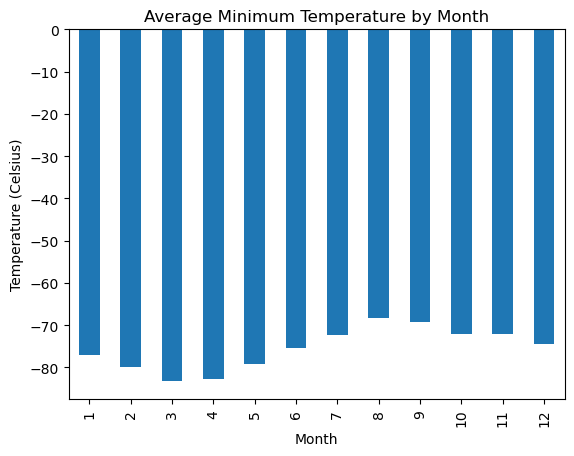

In [108]:
# Plot the average minimum temperature by month
avg_min_temps.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.show()

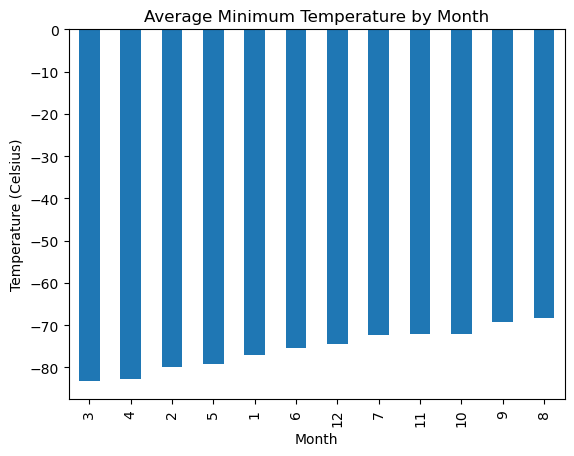

In [109]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temps_sorted = avg_min_temps.sort_values(ascending=True)
avg_min_temps_sorted.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [110]:
# 4. What is the average pressure by month?
avg_pressures = weather_df['pressure'].groupby(weather_df['month']).mean()
avg_pressures

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

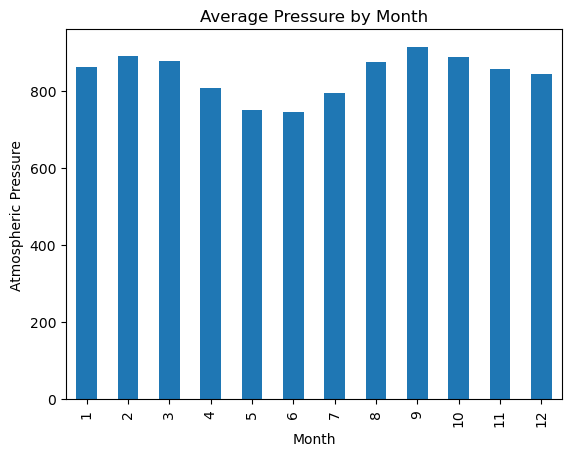

In [111]:
# Plot the average pressure by month
avg_pressures.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

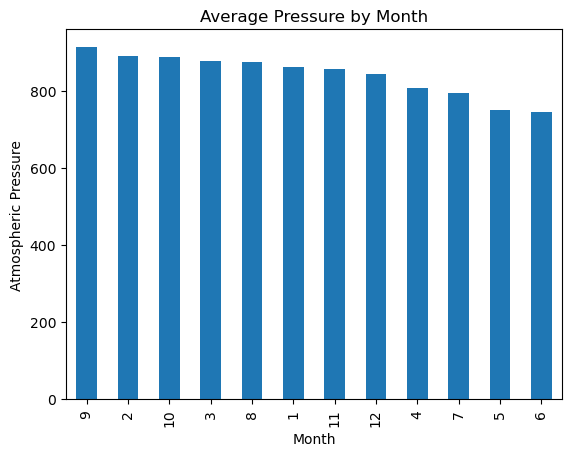

In [112]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressures_sorted = avg_pressures.sort_values(ascending=False)
avg_pressures_sorted.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

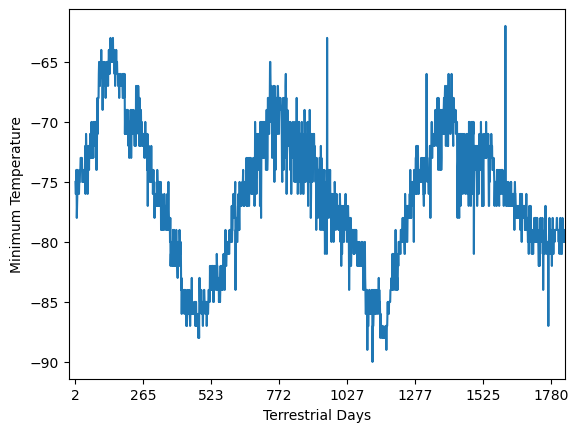

In [113]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
weather_df['min_temp'].plot(kind='line')
plt.xlim(-25, 1800)
plt.xticks=([0, 250, 500, 750, 1000, 1250, 1500, 1750])
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.show()

#### Minimum Temperature

The coldest month recorded by Curiosity on mars is month 3, closely followed by month 4. The Martian winter in the hemisphere where the Curiosity Rover is located approximately lasts from month 2 to month 5. However, even the Martian summer, lasting approximately from month 7 to month 9, would still be unbearably cold for humans, despite the planet's similar appearance to some of the hottest deserts on earth; even the warmest month on Mars averages 69 degrees below 0 C. 

#### Atmospheric Pressure

The two Martian months with the highest average atmospheric pressure are months 2 and 9, which roughly coincide with the beginning of the Martian winter and the end of the Martian summer. Both of these months are also followed by months of temperature drops. I do not know enough about atmospheric science to draw any more of a conclusion about which causes which, or if they're not directly related. 

#### Year Length

Estimating via the graph above, a Martian day is roughly 700 terrestrial days - a little bit below double the length of a year here on Earth. This creates a window of time once every two years where Earth and Mars are closest together, which is crucial for launching spacecraft to the red planet. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [114]:
# Write the data to a CSV
weather_df.to_csv('mars_weather.csv', index=True)

In [115]:
browser.quit()